# Подключим необходимые библиотеки для дальнейшей работы

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Загрузка данных

В этом блоке мы загрузим и посмотрим на данные

In [2]:
file_train = r'train_cs.csv'
file_test = r'test_cs.csv'
df_train = pd.read_csv(file_train)
df_test = pd.read_csv(file_test)

In [3]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type_attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal
4,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,normal


# Предобратока данных

## Обработка категориальных признаков

В данных присутствуют категориальные признаки, такие как "protocol_type", "service" и "flag"

Объединим данные и воспользуемся методом get_dummies который переведет категориальные признаки в числовые методом OneHotEncoding

In [5]:
df_train['is_test'] = 0
df_test['is_test'] = 1

In [6]:
df = pd.concat([df_train, df_test])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144625 entries, 0 to 18651
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     144625 non-null  int64  
 1   protocol_type                144625 non-null  object 
 2   service                      144625 non-null  object 
 3   flag                         144625 non-null  object 
 4   src_bytes                    144625 non-null  int64  
 5   dst_bytes                    144625 non-null  int64  
 6   land                         144625 non-null  int64  
 7   wrong_fragment               144625 non-null  int64  
 8   urgent                       144625 non-null  int64  
 9   hot                          144625 non-null  int64  
 10  num_failed_logins            144625 non-null  int64  
 11  logged_in                    144625 non-null  int64  
 12  num_compromised              144625 non-null  int64  
 13  

Видно, что нет пустых значений а признаках и это хорошо

In [8]:
df_dummies = pd.get_dummies(df, columns=['protocol_type', 'service','flag'])

In [9]:
df_dummies

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18647,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18648,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
18649,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
18650,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0


Видим что колличество признаков увеличилось до 124

Разобьем данные обратно на train и  test

In [10]:
train = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
test = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

## Разбиение на X&Y и train&test

In [11]:
Y_validate = test['type_attack']
X_validate = test.drop('type_attack',axis=1)

In [12]:
Y = train['type_attack']
X = train.drop('type_attack',axis=1)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state = 1)

## Нормирование и стандартизация

In [14]:
normal_X_validate = preprocessing.normalize(X_validate,norm='l1')
scale_X_validate = preprocessing.scale(X_validate)

In [15]:
normal_X_train = preprocessing.normalize(X_train, norm='l1')
normal_X_test = preprocessing.normalize(X_test,norm='l1')

In [16]:
scale_X_train = preprocessing.scale(X_train)
scale_X_test = preprocessing.scale(X_test)

# Подбор параметров моделей

## Применение классификаторов со стандартными настройками

In [17]:
%%time
rf = RandomForestClassifier()
rf.fit(normal_X_train, Y_train)
rf_y_pred_train = rf.predict(normal_X_test)
rf_f1_score_train = f1_score(Y_test, rf_y_pred_train, average='micro')
print('train:',rf_f1_score_train)

rf_y_pred_valid = rf.predict(normal_X_validate)
rf_f1_score_valid = f1_score(Y_validate, rf_y_pred_valid,average='micro')
print('validate:',rf_f1_score_valid)

train: 0.9977376463584045
validate: 0.8638215740939309
Wall time: 32 s


In [32]:
%%time
gbc = GradientBoostingClassifier()
gbc.fit(normal_X_train, Y_train)
gbc_y_pred_train = gbc.predict(normal_X_test)
gbc_f1_score_train = f1_score(Y_test, gbc_y_pred_train, average='micro')
print('train:',gbc_f1_score_train)

gbc_y_pred_valid = gbc.predict(normal_X_validate)
gbc_f1_score_valid = f1_score(Y_validate, gbc_y_pred_valid,average='micro')
print('validate:',gbc_f1_score_valid)

train: 0.9953959118872793
validate: 0.8588355136178426
Wall time: 19min 52s


In [33]:
%%time
svc = SVC()
svc.fit(scale_X_train, Y_train)
svc_y_pred_train = svc.predict(scale_X_test)
svc_f1_score_train = f1_score(Y_test, svc_y_pred_train, average='micro')
print('train:',svc_f1_score_train)

svc_y_pred_valid = svc.predict(scale_X_validate)
svc_f1_score_valid = f1_score(Y_validate, svc_y_pred_valid, average='micro')
print('validate:',svc_f1_score_valid)

train: 0.9895614209168486
validate: 0.8303667167059833
Wall time: 3min 18s


## Подбор параметров

### Greed Search

In [35]:
%%time
rf_parameters = {'n_estimators':(10, 100,200), 'max_depth':(2,6,10),'max_features':('log2','sqrt',50)}
rf_greed = RandomForestClassifier()
scoring = {'f1_micro':make_scorer(f1_score,average='micro')}
rf_clf = GridSearchCV(rf_greed,rf_parameters,scoring=scoring,refit=False)
rf_clf.fit(normal_X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 50min 9s


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [37]:
pd.DataFrame(data=rf_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,split3_test_f1_micro,split4_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro
0,0.563390,0.015394,0.198427,0.006314,2,log2,10,"{'max_depth': 2, 'max_features': 'log2', 'n_es...",0.859149,0.806360,0.856618,0.859638,0.861523,0.848658,0.021207,27
1,3.506798,0.041894,0.539600,0.005533,2,log2,100,"{'max_depth': 2, 'max_features': 'log2', 'n_es...",0.861232,0.860835,0.860736,0.860878,0.861622,0.861061,0.000327,23
2,6.797200,0.091941,0.931400,0.044135,2,log2,200,"{'max_depth': 2, 'max_features': 'log2', 'n_es...",0.861232,0.861084,0.861232,0.860581,0.861325,0.861091,0.000267,22
3,0.699398,0.022354,0.195398,0.001200,2,sqrt,10,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",0.857412,0.857859,0.860439,0.857157,0.860581,0.858689,0.001504,26
4,5.136801,0.095567,0.534406,0.003612,2,sqrt,100,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",0.861133,0.860687,0.860538,0.861126,0.861523,0.861001,0.000352,25
5,10.080999,0.154044,0.907210,0.001154,2,sqrt,200,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",0.861084,0.860835,0.860984,0.861077,0.861325,0.861061,0.000159,24
6,1.976409,0.034481,0.196000,0.001066,2,50,10,"{'max_depth': 2, 'max_features': 50, 'n_estima...",0.880978,0.883112,0.882566,0.881022,0.880675,0.881671,0.000977,19
7,18.002398,0.311959,0.533601,0.000488,2,50,100,"{'max_depth': 2, 'max_features': 50, 'n_estima...",0.880830,0.881574,0.881326,0.880278,0.881022,0.881006,0.000444,20
8,35.483999,0.160000,0.909206,0.013975,2,50,200,"{'max_depth': 2, 'max_features': 50, 'n_estima...",0.880581,0.881078,0.880929,0.880576,0.881221,0.880877,0.000260,21
9,1.005400,0.036570,0.207219,0.005294,6,log2,10,"{'max_depth': 6, 'max_features': 'log2', 'n_es...",0.929996,0.941754,0.934759,0.937038,0.947556,0.938221,0.006011,18


In [40]:
%%time
rf_greed = RandomForestClassifier(n_estimators=200, max_features=50, max_depth=10)
rf_greed.fit(normal_X_train, Y_train)
rf_greed_y_pred_train = rf_greed.predict(normal_X_test)
rf_greed_f1_score_train = f1_score(Y_test, rf_greed_y_pred_train, average='micro')
print('greed_train:',rf_greed_f1_score_train)

rf_greed_y_pred_valid = rf_greed.predict(normal_X_validate)
rf_greed_f1_score_valid = f1_score(Y_validate, rf_greed_y_pred_valid,average='micro')
print('greed_validate:',rf_greed_f1_score_valid)

greed_train: 0.9965866243302243
greed_validate: 0.8617842590606906
Wall time: 2min 13s


In [41]:
%%time
gbc_parameters = {'n_estimators':(10,200), 'max_depth':(2,6),'max_features':('log2',50)}
gbc_greed = GradientBoostingClassifier()
scoring = {'f1_micro':make_scorer(f1_score,average='micro')}
gbc_clf = GridSearchCV(gbc_greed,gbc_parameters,scoring=scoring,refit=False)
gbc_clf.fit(normal_X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 6h 4min 32s


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [42]:
pd.DataFrame(data=gbc_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,split3_test_f1_micro,split4_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro
0,18.739988,1.516427,0.347020,0.008851,2,log2,10,"{'max_depth': 2, 'max_features': 'log2', 'n_es...",0.554525,0.935602,0.871502,0.473183,0.922054,0.751373,0.196796,5
1,667.462517,13.348394,2.876820,0.027367,2,log2,200,"{'max_depth': 2, 'max_features': 'log2', 'n_es...",0.003225,0.000099,0.079133,0.445497,0.294021,0.164395,0.176669,6
2,57.228201,2.304621,0.319208,0.020126,2,50,10,"{'max_depth': 2, 'max_features': 50, 'n_estima...",0.975888,0.975293,0.977972,0.978268,0.037460,0.788976,0.375760,4
3,1490.626820,24.471822,2.512628,0.036910,2,50,200,"{'max_depth': 2, 'max_features': 50, 'n_estima...",0.036069,0.341685,0.000000,0.017762,0.000447,0.079192,0.131915,8
4,26.051000,1.020066,0.368431,0.009008,6,log2,10,"{'max_depth': 6, 'max_features': 'log2', 'n_es...",0.980204,0.981445,0.975193,0.985215,0.978765,0.980164,0.003281,3
5,875.886845,8.987688,4.233643,0.141938,6,log2,200,"{'max_depth': 6, 'max_features': 'log2', 'n_es...",0.040385,0.029073,0.093669,0.192161,0.106723,0.092402,0.058094,7
6,85.999435,1.410293,0.320402,0.003140,6,50,10,"{'max_depth': 6, 'max_features': 50, 'n_estima...",0.994840,0.994890,0.994939,0.994890,0.994542,0.994820,0.000142,2
7,1139.456317,210.796290,1.958609,0.239257,6,50,200,"{'max_depth': 6, 'max_features': 50, 'n_estima...",0.996180,0.996477,0.996726,0.997172,0.996229,0.996557,0.000364,1


In [43]:
%%time
gbc_greed = GradientBoostingClassifier(n_estimators=200, max_features=50, max_depth=6)
gbc_greed.fit(normal_X_train, Y_train)
gbc_greed_y_pred_train = gbc_greed.predict(normal_X_test)
gbc_greed_f1_score_train = f1_score(Y_test, gbc_greed_y_pred_train, average='micro')
print('greed_train:',gbc_greed_f1_score_train)

gbc_greed_y_pred_valid = gbc_greed.predict(normal_X_validate)
gbc_greed_f1_score_valid = f1_score(Y_validate, gbc_greed_y_pred_valid,average='micro')
print('greed_validate:',gbc_greed_f1_score_valid)

greed_train: 0.9968247668188133
greed_validate: 0.8589963542783615
Wall time: 19min 21s


In [17]:
%%time
svc_parameters = {'C':(0.1,1,10), 'kernel':['sigmoid'],'gamma':['auto',0.1]}
svc_greed = SVC()
scoring = {'f1_micro':make_scorer(f1_score,average='micro')}
svc_clf = GridSearchCV(svc_greed,svc_parameters,scoring=scoring,refit=False)
svc_clf.fit(scale_X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 2h 44min 40s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.1, 1, 10), 'gamma': ['auto', 0.1],
                         'kernel': ['sigmoid']},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring={'f1_micro': make_scorer(f1_score, average=micro)},
             verbose=0)

In [18]:
%%time
greed_svc = SVC(C=10, kernel='sigmoid', gamma='auto')
greed_svc.fit(scale_X_train, Y_train)
greed_svc_y_pred_train = greed_svc.predict(scale_X_test)
greed_svc_f1_score_train = f1_score(Y_test, greed_svc_y_pred_train, average='micro')
print('greed_train:',greed_svc_f1_score_train)

greed_svc_y_pred_valid = greed_svc.predict(scale_X_validate)
greed_svc_f1_score_valid = f1_score(Y_validate, greed_svc_y_pred_valid, average='micro')
print('greed_validate:',greed_svc_f1_score_valid)

greed_train: 0.9647152212740622
greed_validate: 0.510025734505683
Wall time: 2min 47s


### Randon Search

In [78]:
%%time
n_iter_search = 27
random_rf = RandomForestClassifier()
rf_params = {'n_estimators':np.arange(10,200,1),'max_depth':np.arange(2,11,1),'max_features':np.arange(50,120,1)}
scoring = {'f1_micro':make_scorer(f1_score,average='micro')}
random_rf_clf = RandomizedSearchCV(random_rf,param_distributions=rf_params,n_iter=n_iter_search,scoring=scoring,refit=False)
random_rf_clf.fit(normal_X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 2h 10min 17s


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [79]:
pd.DataFrame(data=random_rf_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,split3_test_f1_micro,split4_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro
0,33.740714,0.905487,0.600054,0.007684,115,57,3,"{'n_estimators': 115, 'max_features': 57, 'max...",0.940514,0.941605,0.941308,0.938923,0.939767,0.940423,0.000987,16
1,10.185368,0.093430,0.253117,0.006249,26,79,3,"{'n_estimators': 26, 'max_features': 79, 'max_...",0.937885,0.939968,0.938877,0.939023,0.936641,0.938479,0.001132,19
2,146.367217,0.481384,0.781286,0.000057,151,82,9,"{'n_estimators': 151, 'max_features': 82, 'max...",0.995088,0.993600,0.995584,0.994046,0.994493,0.994562,0.000710,3
3,266.366013,1.237669,0.968782,0.000050,198,114,9,"{'n_estimators': 198, 'max_features': 114, 'ma...",0.992360,0.992409,0.993898,0.992657,0.991813,0.992627,0.000692,8
4,44.335413,0.194173,0.478252,0.007685,80,74,5,"{'n_estimators': 80, 'max_features': 74, 'max_...",0.975392,0.977327,0.975392,0.977673,0.976681,0.976493,0.000954,14
5,29.160730,0.044261,0.421886,0.000041,74,119,2,"{'n_estimators': 74, 'max_features': 119, 'max...",0.875273,0.876166,0.876364,0.876259,0.875664,0.875945,0.000413,27
6,54.851669,0.046757,0.628256,0.006180,124,92,3,"{'n_estimators': 124, 'max_features': 92, 'max...",0.937785,0.938480,0.938579,0.940461,0.936740,0.938409,0.001218,20
7,28.547027,0.187881,0.359388,0.000067,51,64,6,"{'n_estimators': 51, 'max_features': 64, 'max_...",0.982983,0.984521,0.986654,0.985363,0.985661,0.985036,0.001233,11
8,7.838765,0.084602,0.256276,0.007628,26,60,3,"{'n_estimators': 26, 'max_features': 60, 'max_...",0.936595,0.935602,0.936595,0.941801,0.932374,0.936593,0.003030,22
9,68.103084,0.482043,0.487555,0.006286,82,85,7,"{'n_estimators': 82, 'max_features': 85, 'max_...",0.988043,0.988192,0.990127,0.988588,0.988440,0.988678,0.000749,9


In [17]:
%%time
rf_random = RandomForestClassifier(n_estimators=21, max_features=53, max_depth=10)
rf_random.fit(normal_X_train, Y_train)
rf_random_y_pred_train = rf_random.predict(normal_X_test)
rf_random_f1_score_train = f1_score(Y_test, rf_random_y_pred_train, average='micro')
print('random_train:',rf_random_f1_score_train)

rf_random_y_pred_valid = rf_random.predict(normal_X_validate)
rf_random_f1_score_valid = f1_score(Y_validate, rf_random_y_pred_valid,average='micro')
print('random_validate:',rf_random_f1_score_valid)

random_train: 0.9960706489382815
random_validate: 0.8583529916362856
Wall time: 15.4 s


In [17]:
%%time
n_iter_search = 8
random_gbc = GradientBoostingClassifier()
gbc_params = {'n_estimators':np.arange(10,200,1),'max_depth':np.arange(2,11,1),'max_features':np.arange(50,120,1)}
scoring = {'f1_micro':make_scorer(f1_score,average='micro')}
random_gbc_clf = RandomizedSearchCV(random_gbc,param_distributions=gbc_params,n_iter=n_iter_search,scoring=scoring,refit=False)
random_gbc_clf.fit(normal_X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 6h 39min 19s


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                 

In [18]:
pd.DataFrame(data=random_gbc_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,split3_test_f1_micro,split4_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro
0,359.541707,65.818911,0.795169,0.062151,53,52,3,"{'n_estimators': 53, 'max_features': 52, 'max_...",0.994344,0.956192,0.992459,0.000000,0.995386,0.787676,0.394112,8
1,700.827049,16.267101,0.665651,0.012493,50,114,7,"{'n_estimators': 50, 'max_features': 114, 'max...",0.996527,0.996477,0.997122,0.996577,0.996924,0.996725,0.000253,2
2,653.882586,35.007199,1.150175,0.048021,128,52,8,"{'n_estimators': 128, 'max_features': 52, 'max...",0.996924,0.996477,0.996924,0.996725,0.997222,0.996854,0.000246,1
3,277.229950,2.229695,0.396899,0.007645,17,101,9,"{'n_estimators': 17, 'max_features': 101, 'max...",0.996378,0.996031,0.996626,0.996924,0.996180,0.996428,0.000318,6
4,878.715896,39.357350,0.856247,0.022973,74,106,6,"{'n_estimators': 74, 'max_features': 106, 'max...",0.996676,0.995981,0.997222,0.996825,0.996378,0.996616,0.000418,4
5,287.820830,3.860790,0.431273,0.007636,20,88,10,"{'n_estimators': 20, 'max_features': 88, 'max_...",0.995981,0.995584,0.996329,0.996874,0.996080,0.996170,0.000426,7
6,1416.693394,168.961143,1.547011,0.122261,175,87,6,"{'n_estimators': 175, 'max_features': 87, 'max...",0.996477,0.996329,0.996676,0.996874,0.996825,0.996636,0.000207,3
7,210.816237,1.481523,0.453194,0.009875,23,57,9,"{'n_estimators': 23, 'max_features': 57, 'max_...",0.996279,0.996924,0.996676,0.996130,0.996725,0.996547,0.000295,5


In [20]:
%%time
gbc_random = GradientBoostingClassifier(n_estimators=128, max_features=52, max_depth=8)
gbc_random.fit(normal_X_train, Y_train)
gbc_random_y_pred_train = gbc_random.predict(normal_X_test)
gbc_random_f1_score_train = f1_score(Y_test, gbc_random_y_pred_train, average='micro')
print('random_train:',gbc_random_f1_score_train)

gbc_random_y_pred_valid = gbc_random.predict(normal_X_validate)
gbc_random_f1_score_valid = f1_score(Y_validate, gbc_random_y_pred_valid,average='micro')
print('random_validate:',gbc_random_f1_score_valid)

random_train: 0.9974201230402858
random_validate: 0.8570662663521339
Wall time: 12min 49s


In [17]:
%%time
n_iter_search = 8
random_svc = SVC()
svc_params = {'C':np.arange(0.1,10,0.1),'kernel':['sigmoid','rbf'],'gamma':np.arange(0.01,1,0.01)}
scoring = {'f1_micro':make_scorer(f1_score,average='micro')}
random_svc_clf = RandomizedSearchCV(random_svc,param_distributions=svc_params,n_iter=n_iter_search,scoring=scoring,refit=False)
random_svc_clf.fit(scale_X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 11h 40min 24s


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=8, n_jobs=None,
                   param_distributions={'C': array([0.1...
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                                        'kernel': ['sigmoid', 'rbf']},
                   pre_dispatch='2*n_j

In [18]:
pd.DataFrame(data=random_svc_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,split3_test_f1_micro,split4_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro
0,690.056834,160.070271,98.809146,3.120298,sigmoid,0.82,0.5,"{'kernel': 'sigmoid', 'gamma': 0.8200000000000...",0.770341,0.790335,0.782745,0.783428,0.764227,0.778215,0.009511,8
1,1619.723256,32.105876,26.104054,0.373265,rbf,0.51,8.2,"{'kernel': 'rbf', 'gamma': 0.51, 'C': 8.2}",0.990970,0.990425,0.990772,0.990474,0.990672,0.990663,0.000200,4
2,602.048445,55.784635,98.908476,2.683212,sigmoid,0.29,6.6,"{'kernel': 'sigmoid', 'gamma': 0.2900000000000...",0.798174,0.795892,0.789938,0.786455,0.787894,0.791671,0.004574,6
3,2215.307436,117.926615,31.306073,1.137615,rbf,0.71,6.9,"{'kernel': 'rbf', 'gamma': 0.7100000000000001,...",0.990077,0.989978,0.990276,0.989531,0.990325,0.990038,0.000283,5
4,569.543831,27.487125,99.515832,4.633342,sigmoid,0.15,0.4,"{'kernel': 'sigmoid', 'gamma': 0.1500000000000...",0.787210,0.788252,0.788500,0.786604,0.799405,0.789994,0.004755,7
5,250.438247,4.581793,14.191381,0.153593,rbf,0.06,2.6,"{'kernel': 'rbf', 'gamma': 0.06000000000000000...",0.992657,0.992905,0.993203,0.992558,0.992905,0.992846,0.000225,1
6,988.109058,32.784956,20.284560,0.903457,rbf,0.27,7.2,"{'kernel': 'rbf', 'gamma': 0.27, 'C': 7.2}",0.992310,0.991615,0.991417,0.991119,0.991565,0.991605,0.000393,2
7,1059.754486,14.375392,20.642397,0.149592,rbf,0.31,4.8,"{'kernel': 'rbf', 'gamma': 0.31, 'C': 4.8}",0.991863,0.991367,0.991268,0.990970,0.991417,0.991377,0.000288,3


In [17]:
%%time
random_svc = SVC(C=2.6, kernel='rbf', gamma=0.06)
random_svc.fit(scale_X_train, Y_train)
random_svc_y_pred_train = random_svc.predict(scale_X_test)
random_svc_f1_score_train = f1_score(Y_test, random_svc_y_pred_train, average='micro')
print('random_train:',random_svc_f1_score_train)

random_svc_y_pred_valid = random_svc.predict(scale_X_validate)
random_svc_f1_score_valid = f1_score(Y_validate, random_svc_y_pred_valid, average='micro')
print('greed_validate:',random_svc_f1_score_valid)

random_train: 0.9913077991665012
greed_validate: 0.7719279433840875
Wall time: 7min 8s


### Посмотрим матрицу ошибок для лучшей модели

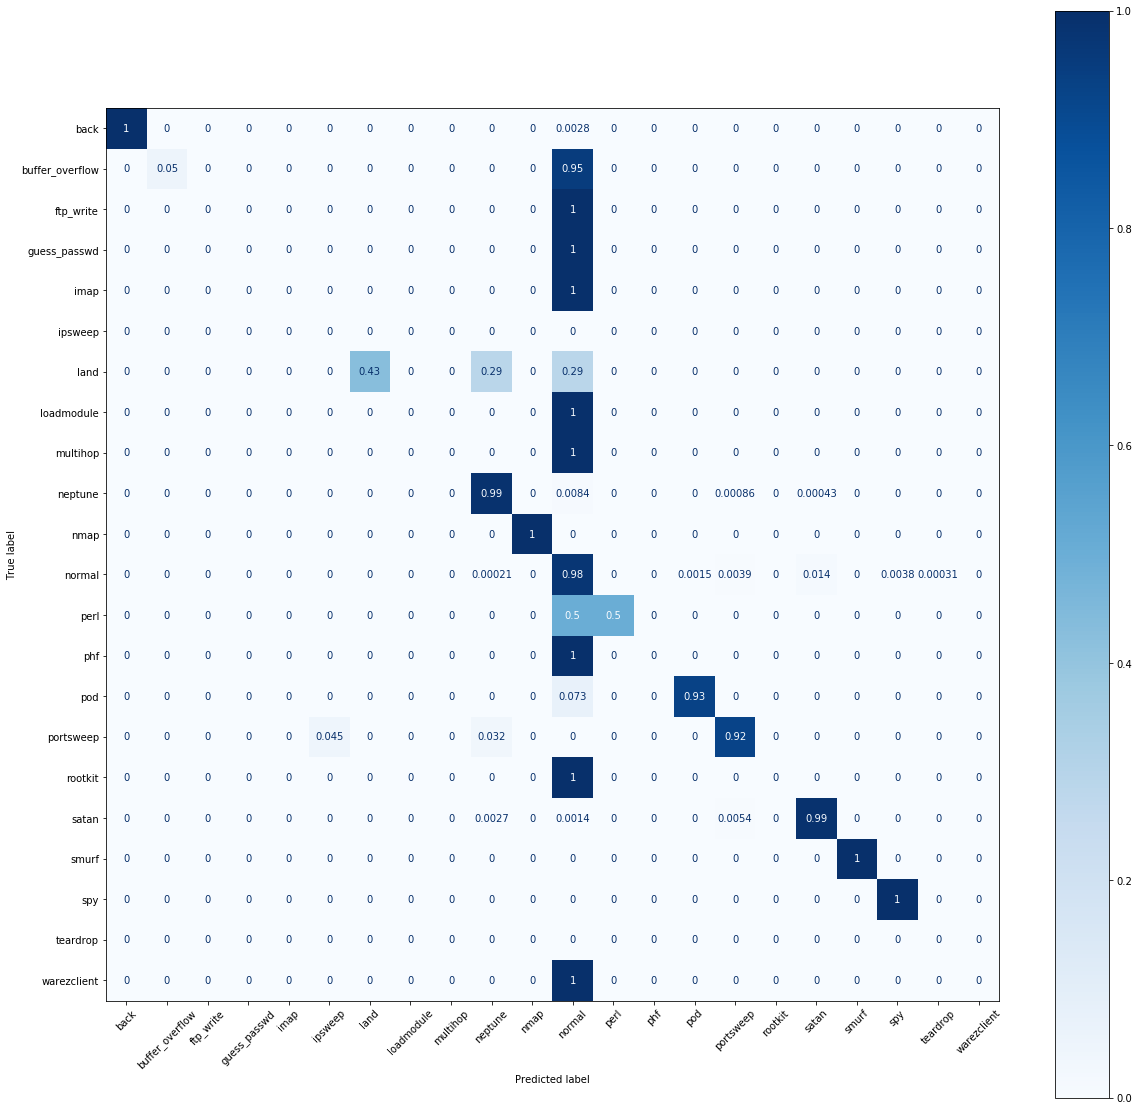

In [33]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(rf, normal_X_validate, Y_validate,normalize='true',cmap=plt.cm.Blues,ax=ax,xticks_rotation=45)
plt.savefig("1.png")

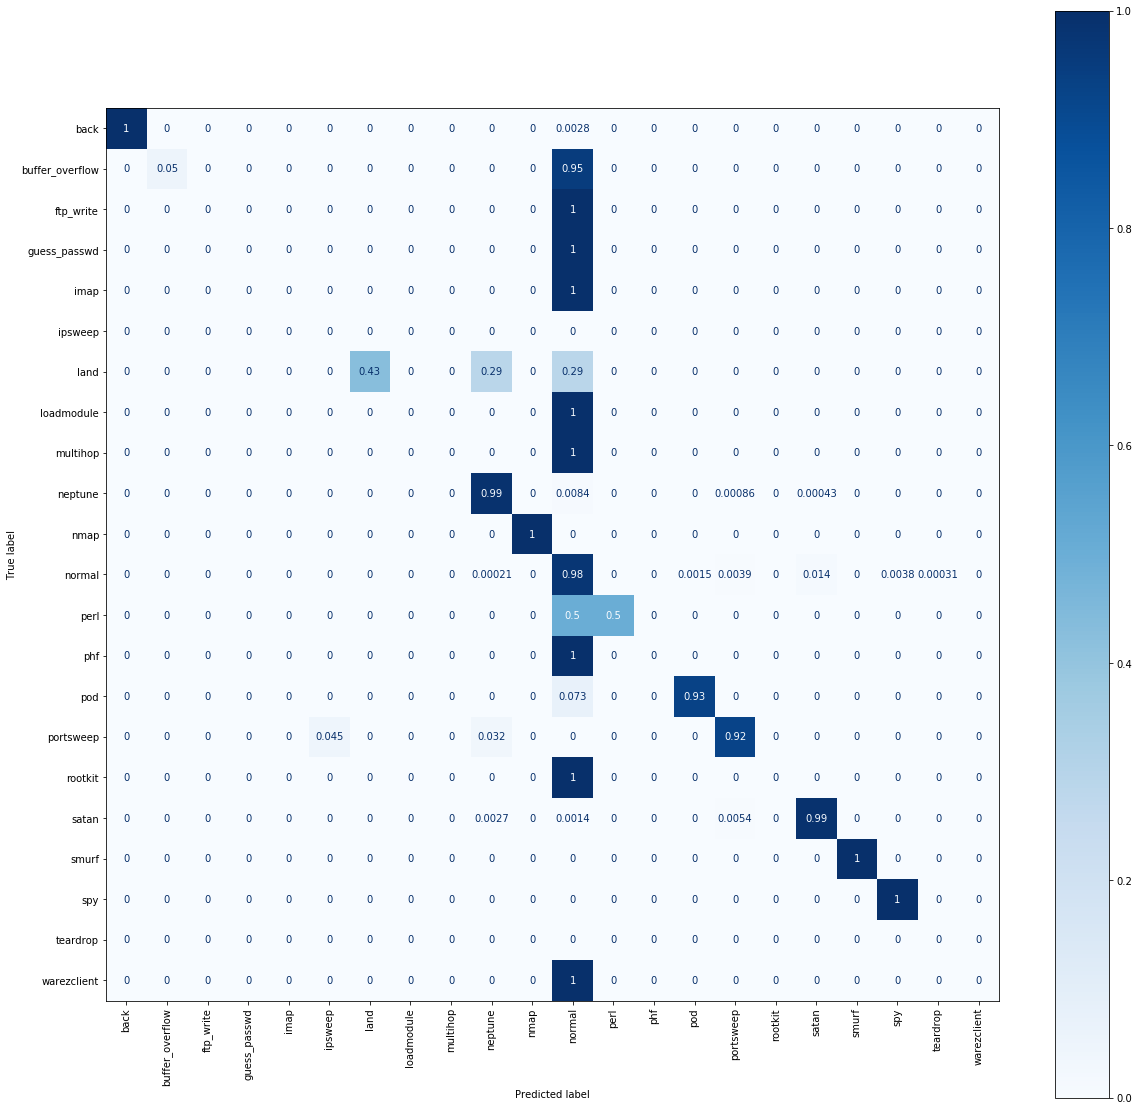

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(rf, normal_X_validate, Y_validate,normalize='true',cmap=plt.cm.Blues,ax=ax,xticks_rotation='vertical')
plt.savefig("2.png")

# Построение новых признаков

In [19]:
new_df_dummies = df_dummies.copy()

In [20]:
new_df_dummies['new_feature_1'] = df_dummies['dst_bytes'] - df_dummies['src_bytes']
new_df_dummies['new_feature_2'] = df_dummies['dst_host_same_src_port_rate'] * df_dummies['dst_host_srv_count']

In [21]:
new_train = new_df_dummies[new_df_dummies.is_test==0].drop('is_test', axis=1)
new_test = new_df_dummies[new_df_dummies.is_test==1].drop('is_test', axis=1)

In [22]:
new_df_dummies.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,new_feature_1,new_feature_2
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,-491,4.25
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,-146,0.88
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.00
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,7921,7.65
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,221,0.00


In [23]:
new_Y_validate = new_test['type_attack']
new_X_validate = new_test.drop('type_attack',axis=1)

new_Y = new_train['type_attack']
new_X = new_train.drop('type_attack',axis=1)

new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(new_X, new_Y, test_size=0.2,random_state = 1)

new_normal_X_validate = preprocessing.normalize(new_X_validate,norm='l1')
new_scale_X_validate = preprocessing.scale(new_X_validate)

new_normal_X_train = preprocessing.normalize(new_X_train, norm='l1')
new_normal_X_test = preprocessing.normalize(new_X_test,norm='l1')

new_scale_X_train = preprocessing.scale(new_X_train)
new_scale_X_test = preprocessing.scale(new_X_test)

In [24]:
%%time
new_rf = RandomForestClassifier()
new_rf.fit(new_normal_X_train, new_Y_train)
new_rf_y_pred_train = new_rf.predict(new_normal_X_test)
new_rf_f1_score_train = f1_score(new_Y_test, new_rf_y_pred_train, average='micro')
print('train:',new_rf_f1_score_train)

new_rf_y_pred_valid = new_rf.predict(new_normal_X_validate)
new_rf_f1_score_valid = f1_score(new_Y_validate, new_rf_y_pred_valid,average='micro')
print('validate:',new_rf_f1_score_valid)

train: 0.9976582655288748
validate: 0.8640360283079562
Wall time: 27.9 s


### Посмотрим матрицу ошибок для лучшей модели с новыми признаками

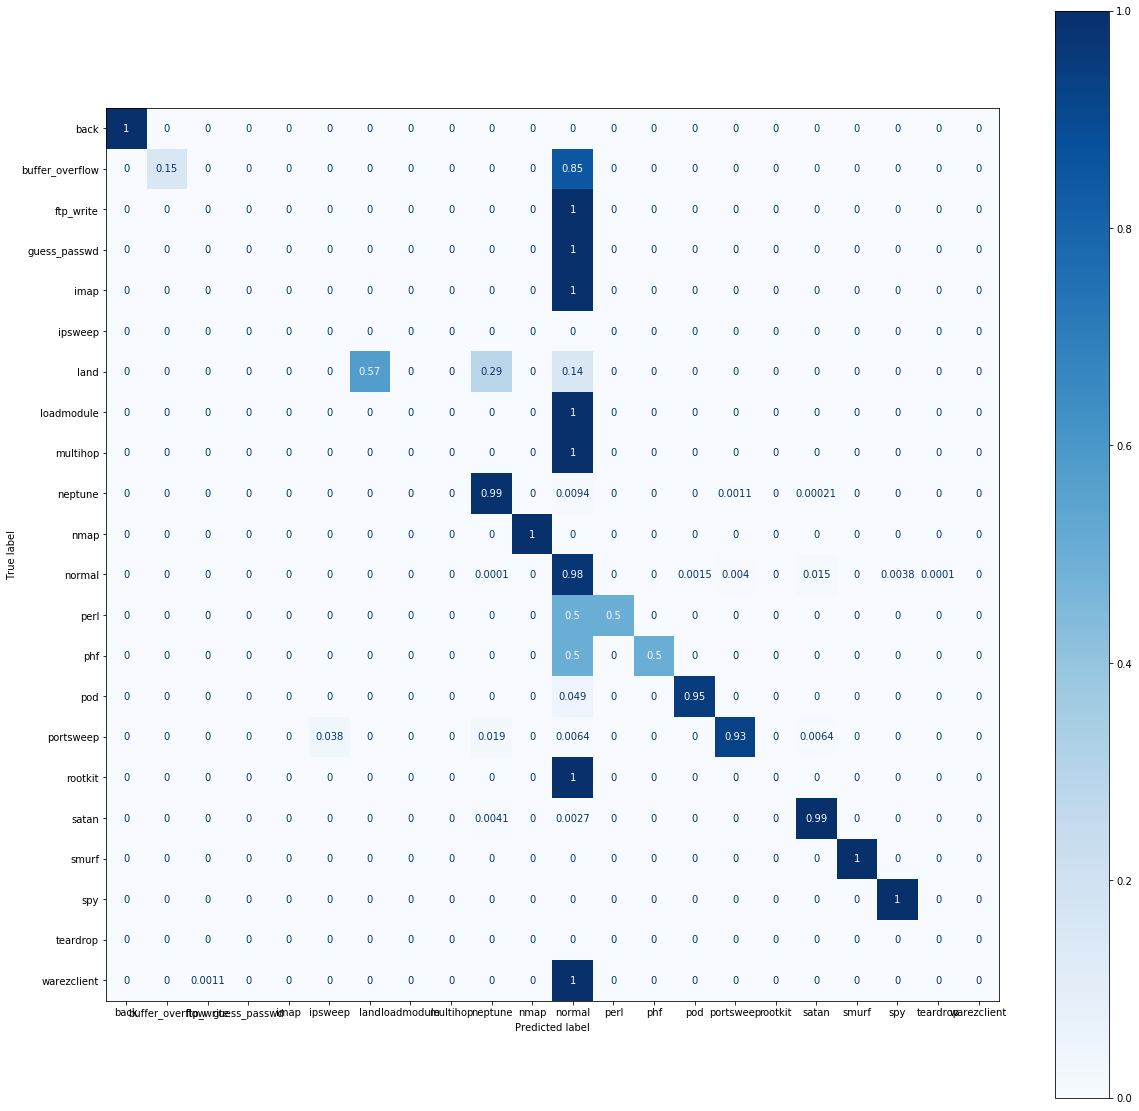

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(new_rf, new_normal_X_validate, new_Y_validate,normalize='true',cmap=plt.cm.Blues,ax=ax)

# Эксперемент с вероятностями

In [156]:
train_a, train_b, test_a, test_b = train_test_split(X,Y, test_size=0.5, random_state=1)

In [157]:
normal_train_a = preprocessing.normalize(train_a, norm='l1')
normal_train_b = preprocessing.normalize(train_b,norm='l1')

In [158]:
rf_proba_without_b = RandomForestClassifier()
rf_proba_without_b.fit(normal_train_a,test_a)
rf_proba_without_b_y_pred = rf_proba_without_b.predict(normal_X_validate)
rf_proba_without_b_score = f1_score(Y_validate, rf_proba_without_b_y_pred,average='micro')
print('validate without b:',rf_proba_without_b_score)

validate without b: 0.8640360283079562


In [159]:
rf_proba = RandomForestClassifier()
rf_proba.fit(normal_train_a,test_a)
rf_proba_predict_pdoba = rf_proba.predict_proba(normal_train_b)

In [160]:
good_objects = []
good_classes = []
for i, obj in enumerate(rf_proba_predict_pdoba):
    if max(obj) >= 0.9:
        good_objects.append(i)
        classes_ = rf_proba.classes_
        idx = np.where(obj == max(obj))
        tmp = classes_[idx]
        good_classes.append(tmp)
all_index = [i for i in range(len(train_b))]
bad_objects = list(set(all_index) - set(good_objects))

In [161]:
new_df_a = train_b.reset_index().drop('index',axis=1).drop(bad_objects,axis=0)
new_df_b = pd.DataFrame(data=good_classes,columns=['type_attack'],index=good_objects)

df_a = pd.concat([train_a,test_a],axis=1)
df_b = pd.concat([new_df_a,new_df_b],axis=1)

concat_df = pd.concat([df_a,df_b])

prob_X = concat_df.drop('type_attack',axis=1)
prob_Y =  concat_df['type_attack']

normal_prob_x = preprocessing.normalize(prob_X, norm='l1')

In [162]:
%%time
prob_rf = RandomForestClassifier()
prob_rf.fit(normal_prob_x, prob_Y)

prob_rf_y_pred_valid = prob_rf.predict(normal_X_validate)
prob_rf_f1_score_valid = f1_score(Y_validate, prob_rf_y_pred_valid,average='micro')
print('validate:',prob_rf_f1_score_valid)

validate: 0.8639824147544499
Wall time: 34.1 s


# Построение кривой обучения

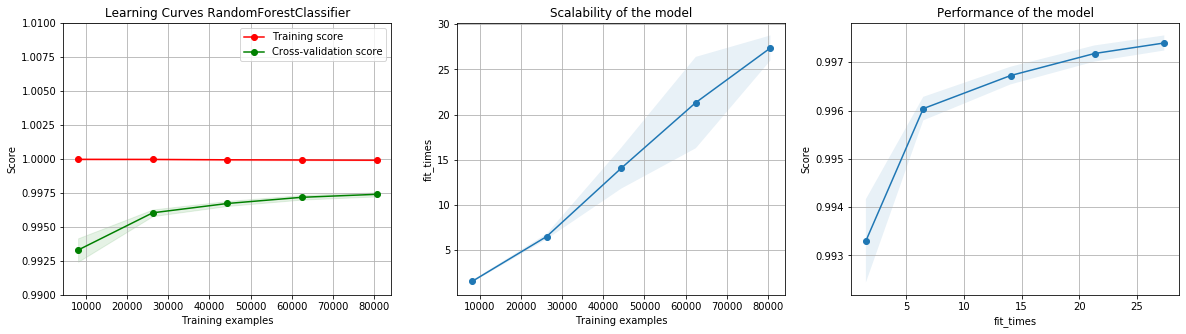

Wall time: 6min 38s


In [39]:
%%time

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



title = "Learning Curves RandomForestClassifier"

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, normal_X_train, Y_train, ylim=(0.99, 1.01), cv=cv)

plt.show()